In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import tree
%matplotlib inline

In [3]:
# Import data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
#statistical summary of the training data
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


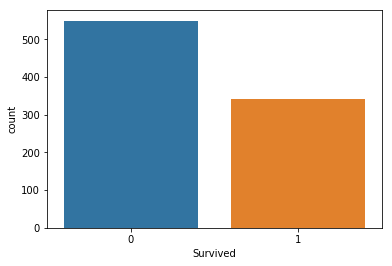

In [7]:
#Data analysis with Visualization
sns.countplot(x='Survived', data=df_train)

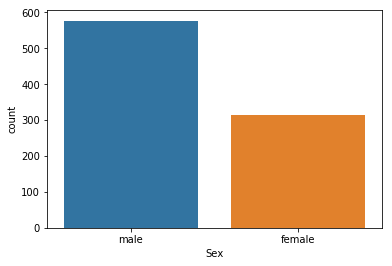

In [8]:
sns.countplot(x='Sex', data=df_train)

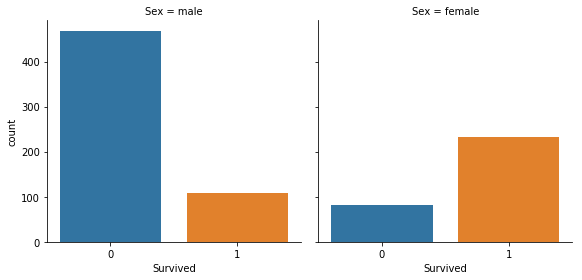

In [9]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=df_train)

In [10]:
df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [11]:
# Using pandas to figure out the proportion of women that survived, along with the proportion of men
print(df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print(df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

0.7420382165605095
0.18890814558058924


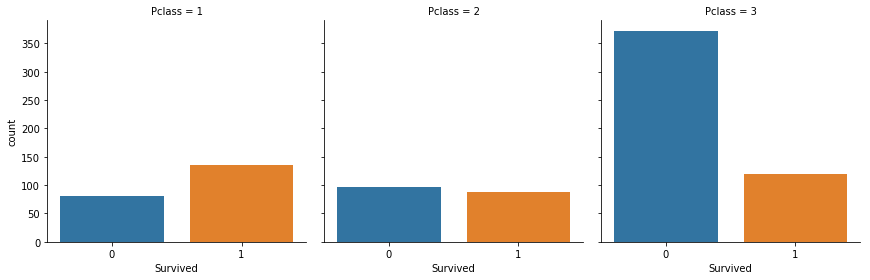

In [12]:
# Using seaborn to build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Pclass'
sns.factorplot(x='Survived', col='Pclass', kind='count', data=df_train)

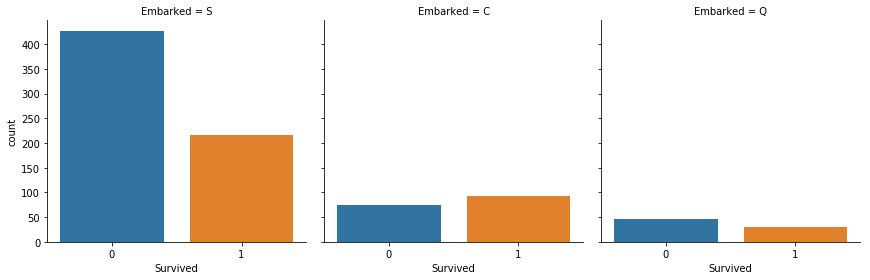

In [13]:
# Using seaborn to build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Embarked'
sns.factorplot(x='Survived', col='Embarked', kind='count', data=df_train)

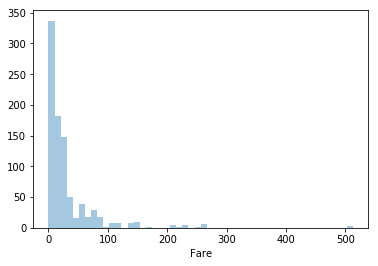

In [14]:
# Using seaborn to plot a histogram of the 'Fare' column of df_train
sns.distplot(df_train.Fare, kde=False)

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

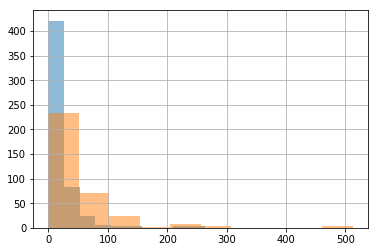

In [15]:
# Using a pandas plotting method to plot the column 'Fare' for each value of 'Survived' on the same plot.
df_train.groupby('Survived').Fare.hist(alpha=0.5)

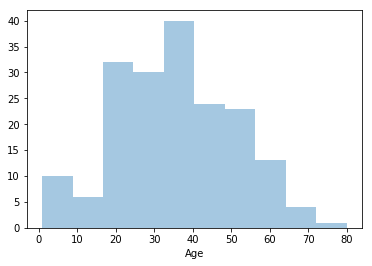

In [16]:
# Using seaborn to plot a histogram of the 'Age' column of df_train. We will need to drop null values before doing so
df_train_drop = df_train.dropna()
sns.distplot(df_train_drop.Age, kde=False)

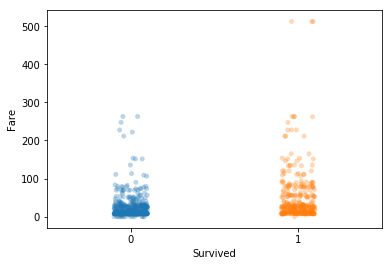

In [17]:
# Ploting a strip plot & a swarm plot of 'Fare' with 'Survived' on the x-axis
sns.stripplot(x='Survived', y='Fare', data=df_train, alpha=0.3, jitter=True)

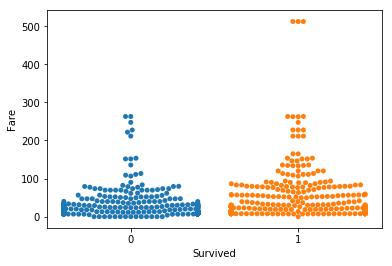

In [18]:
sns.swarmplot(x='Survived', y='Fare', data=df_train)

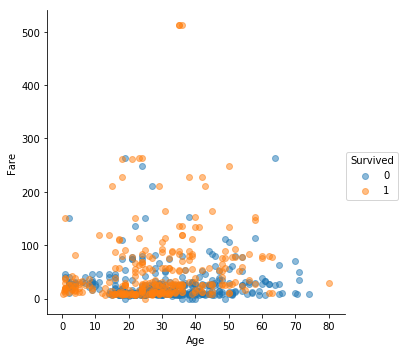

In [19]:
# Using seaborn to plot a scatter plot of 'Age' against 'Fare', colored by 'Survived'
sns.lmplot(x='Age', y='Fare', hue='Survived', data=df_train, fit_reg=False, scatter_kws={'alpha':0.5})

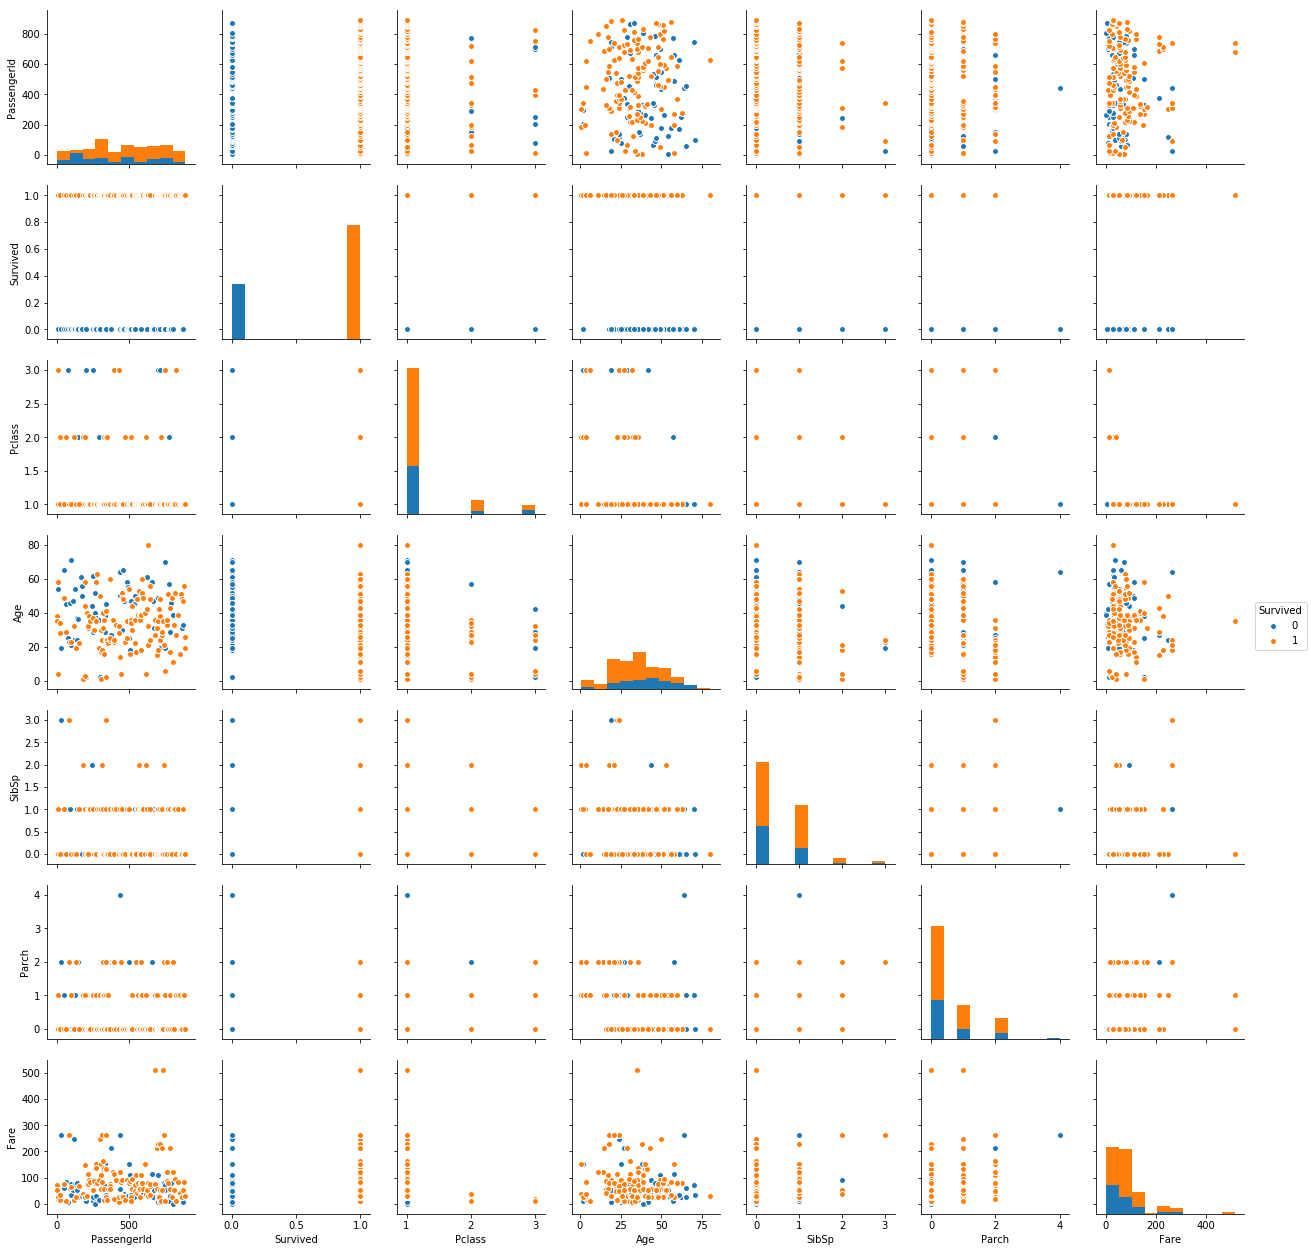

In [20]:
# Using seaborn to create a pairplot of df_train, colored by 'Survived'
sns.pairplot(df_train_drop, hue='Survived')

In [21]:
# Storing target variable of training data
survived_train = df_train.Survived

In [22]:
# Concatenating training and test sets
data = pd.concat([df_train.drop(['Survived'], axis=1), df_test])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [24]:
# Impute missing numerical variables
data['Age'] = data.Age.fillna(data.Age.median())
data['Fare'] = data.Fare.fillna(data.Fare.median())

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [26]:
#Using Pandas function get_dummies() which converts the categorical variable into numerical
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [27]:
# Select columns and view head
data = data[['Sex_male', 'Fare', 'Age','Pclass', 'SibSp','Parch']]
data.head()

,Sex_male,Fare,Age,Pclass,SibSp,Parch
0,1,7.2500,22.0,3,1,0
1,0,71.2833,38.0,1,1,0
2,0,7.9250,26.0,3,0,0
3,0,53.1000,35.0,1,1,0
4,1,8.0500,35.0,3,0,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 6 columns):
Sex_male    1309 non-null uint8
Fare        1309 non-null float64
Age         1309 non-null float64
Pclass      1309 non-null int64
SibSp       1309 non-null int64
Parch       1309 non-null int64
dtypes: float64(2), int64(3), uint8(1)
memory usage: 62.6 KB


In [29]:
# Before fitting a model to your data, split it back into training and test sets
data_train = data.iloc[:891]
data_test = data.iloc[891:]

In [30]:
# A Scikit requirement transform the dataframes to arrays
X = data_train.values
test = data_test.values
y = survived_train.values

In [31]:
# building decision tree classifier with max_depth=3 and then fit it into data
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
# Make predictions and store in 'Survived' column of df_test
Y_pred = clf.predict(test)
df_test['Survived'] = Y_pred
df_test[['PassengerId', 'Survived']].to_csv('1st_dec_tree.csv', index=False)

In [33]:
#How well did model perform
acc_decision_tree = round(clf.score(X, y), 4)
print("Accuracy: %0.4f" % (acc_decision_tree))

Accuracy: 0.8272
